# Customer Segmentation and Analysis

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected=True)

## Importing Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Rename the 'Genre' column to 'Gender'
df.rename(columns={'Genre': 'Gender'}, inplace=True)

## Descriptive Statistics

In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

### Histograms

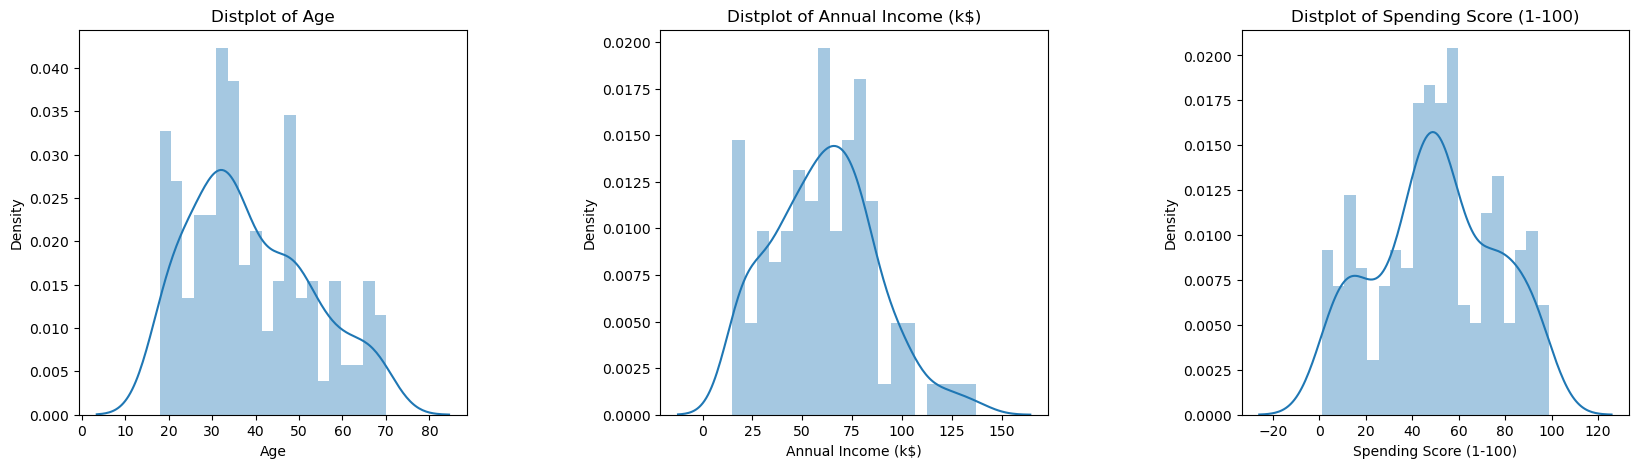

In [9]:
plt.figure(1 , figsize = (20 , 5))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

- Age group near 30-40 have the highest density.
- Most customers have income in range of 50-80k.
- Most of the customers have spending score of 50.

### Count Plot of Gender

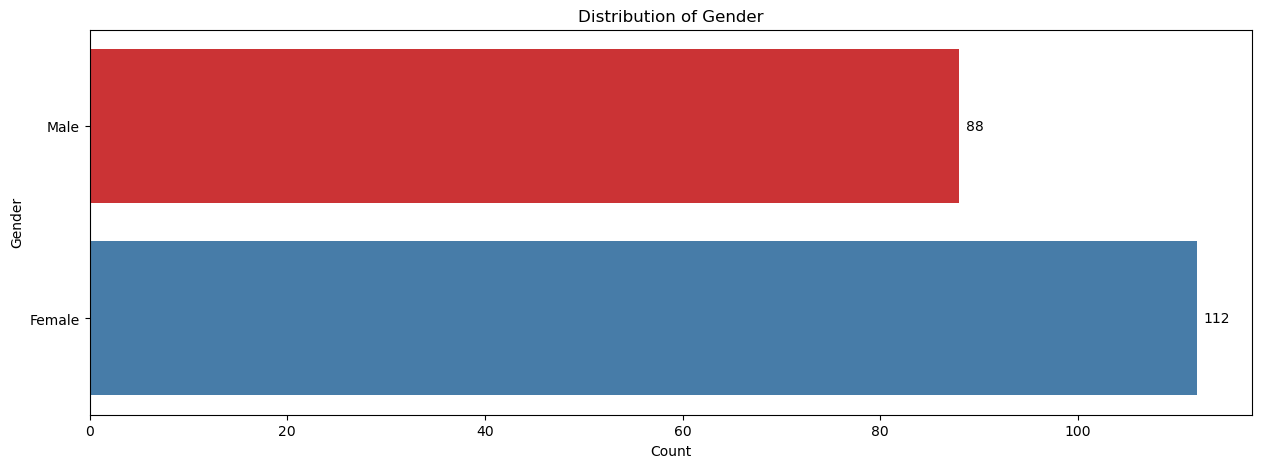

In [10]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(y='Gender', data=df, palette='Set1')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Distribution of Gender')

# Add values to the countplot bars
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2),
                ha = 'left', va = 'center', xytext = (5, 0), textcoords = 'offset points')

plt.show()

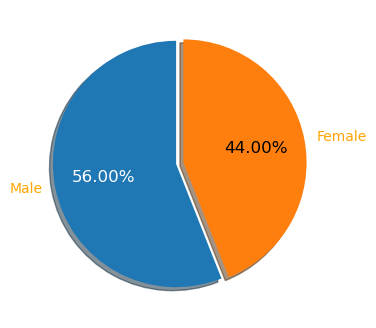

In [11]:
values = df['Gender'].value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize = (4, 4), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'orange')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

### Ploting the Relation between Age , Annual Income and Spending Score

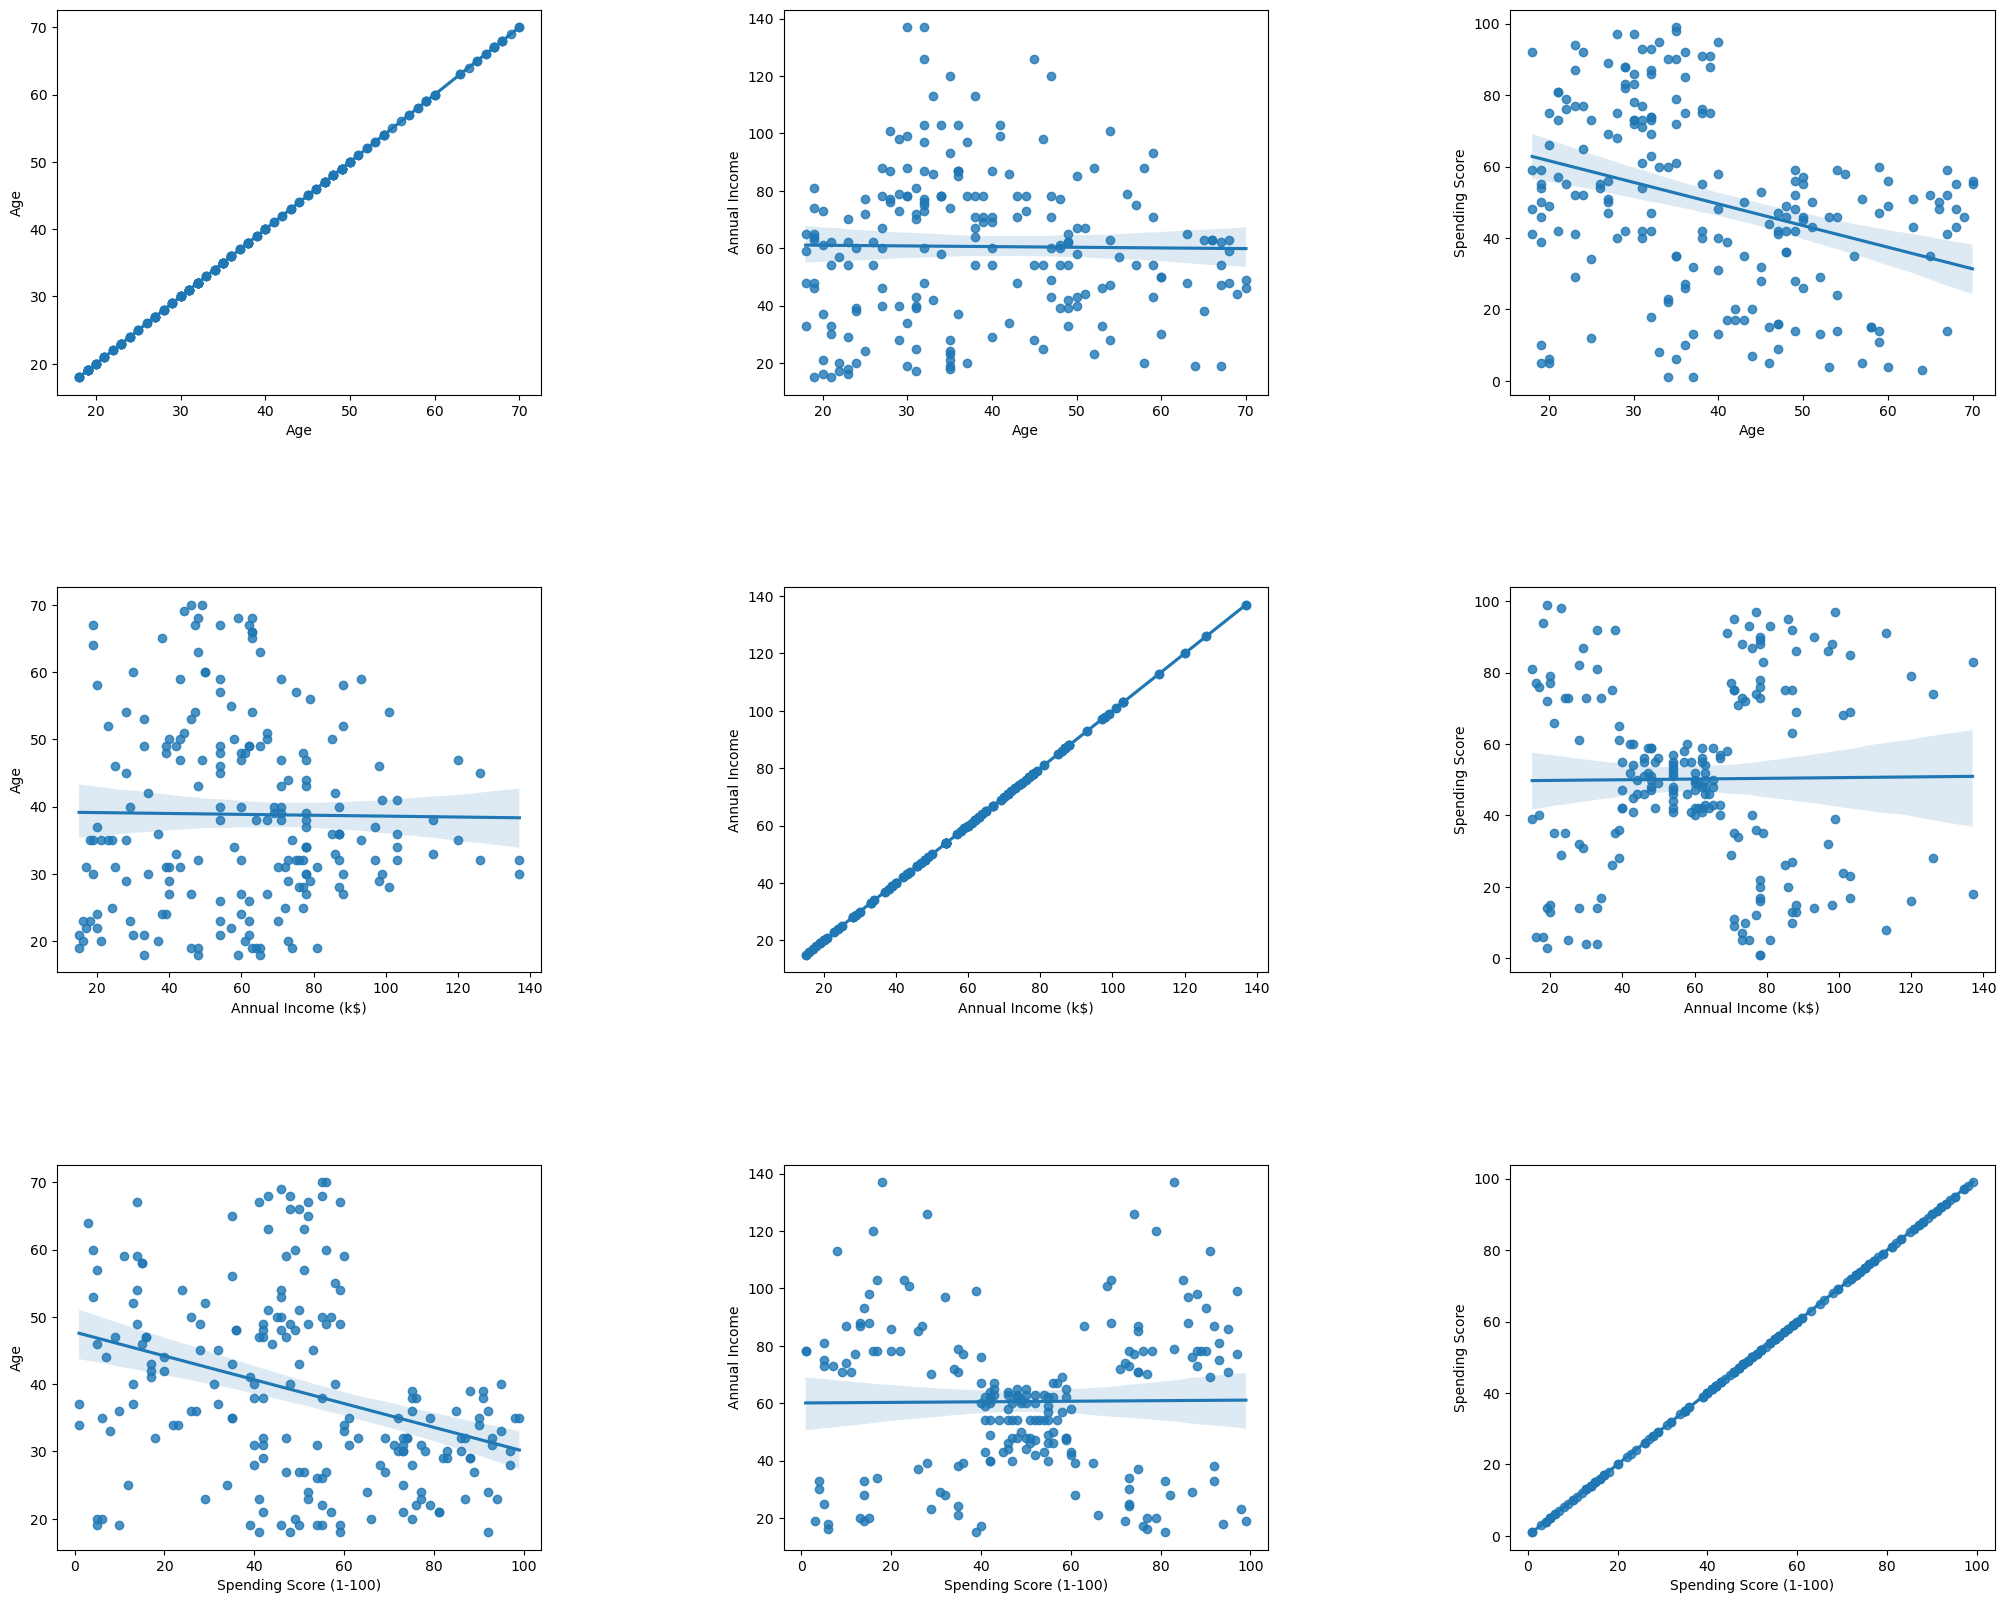

In [12]:
plt.figure(1 , figsize = (25 , 20))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

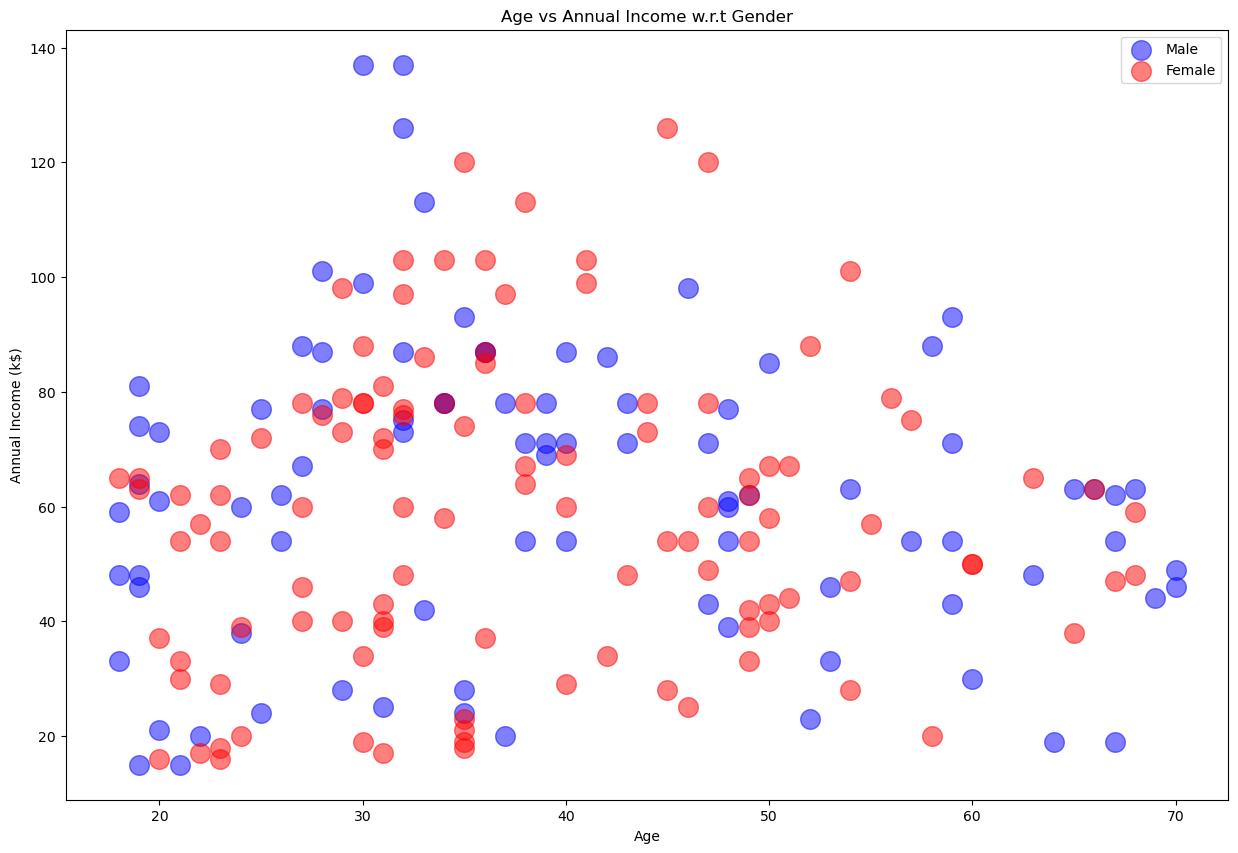

In [13]:
plt.figure(figsize=(15, 10))
colors = {'Male': 'blue', 'Female': 'red'}
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == gender],
                s=200, alpha=0.5, label=gender, color=colors[gender])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()


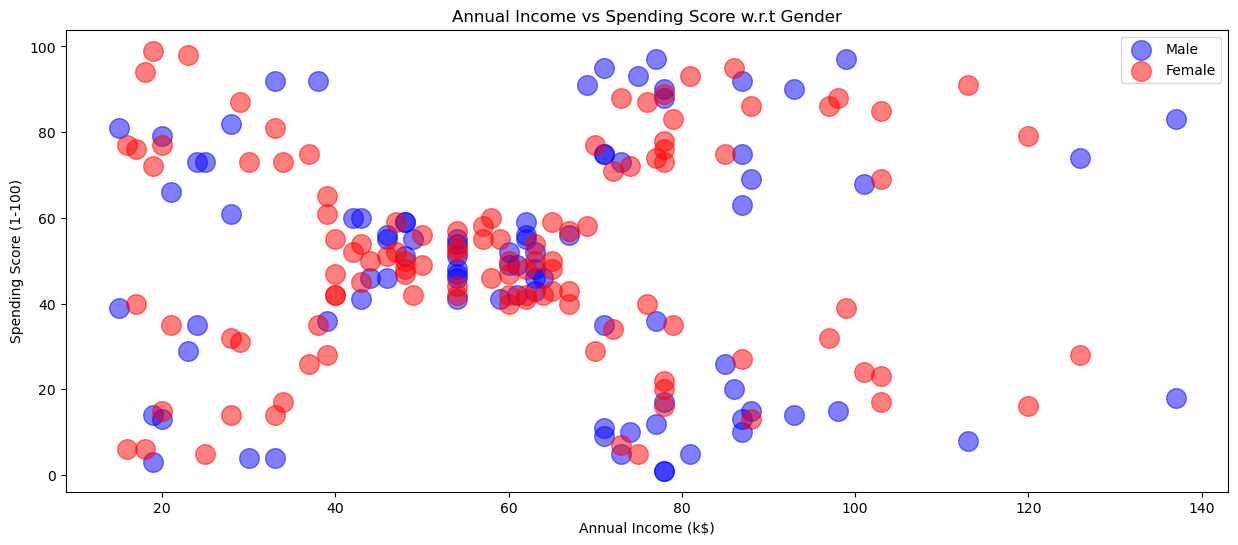

In [14]:
plt.figure(figsize=(15, 6))
colors = {'Male': 'blue', 'Female': 'red'}
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=df[df['Gender'] == gender], s=200, alpha=0.5,
                label=gender, color=colors[gender])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

## Distribution of values in Age , Annual Income and Spending Score according to Gender

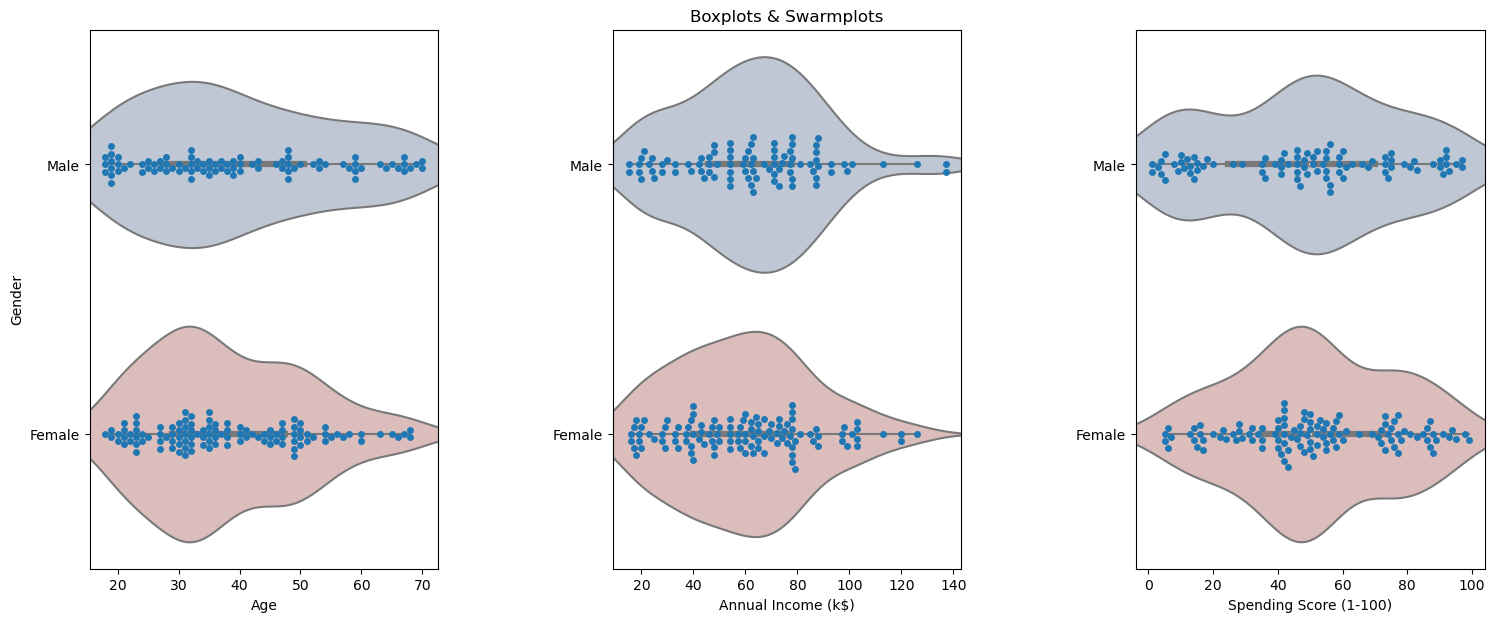

In [15]:
plt.figure(1 , figsize = (18 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

In [16]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 55]

In [17]:
x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

px.bar(data_frame = df, x = x_age, y = y_age, color = x_age,
       title = 'Number of customers per age group')

In [18]:
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) &
                                       (df['Spending Score (1-100)'] <= 20)]

ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) &
                                       (df['Spending Score (1-100)'] <= 40)]

ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) &
                                       (df['Spending Score (1-100)'] <= 60)]

ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) &
                                       (df['Spending Score (1-100)'] <= 80)]

ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) &
                                       (df['Spending Score (1-100)'] <= 100)]

x_ss = ['1-20', '21-40', '41-60', '61-80', '81-100']
y_ss = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values),
        len(ss_81_100.values)]

px.bar(data_frame = df, x = x_ss, y = y_ss, color = x_ss,
       title = 'Number of customers per Spending Score group')

- Most of the customers spending score is between 41-60k.

In [19]:
ai_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ai_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31)&(df['Annual Income (k$)'] <= 60)]
ai_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61)&(df['Annual Income (k$)'] <= 90)]
ai_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)']>= 91)&(df['Annual Income (k$)']<=120)]
ai_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=121)&(df['Annual Income (k$)']<=150)]

x_ai = ['$ 0-30,000', '$ 30,001-60,000', '$ 60,001-90,000', '$ 90,001-120,000', '$ 120,000-150,000']
y_ai = [len(ai_0_30.values) , len(ai_31_60.values) , len(ai_61_90.values) , len(ai_91_120.values),
         len(ai_121_150.values)]

px.bar(data_frame = df, x = x_ai, y = y_ai, color = x_ai,
       title = 'Number of customers per Annual Income group')

- Most of the customers annual income lies between 60k-90k.

## Clustering using K- means

### 1.Segmentation using Age and Spending Score

In [20]:
X1 = df[['Age', 'Spending Score (1-100)']].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

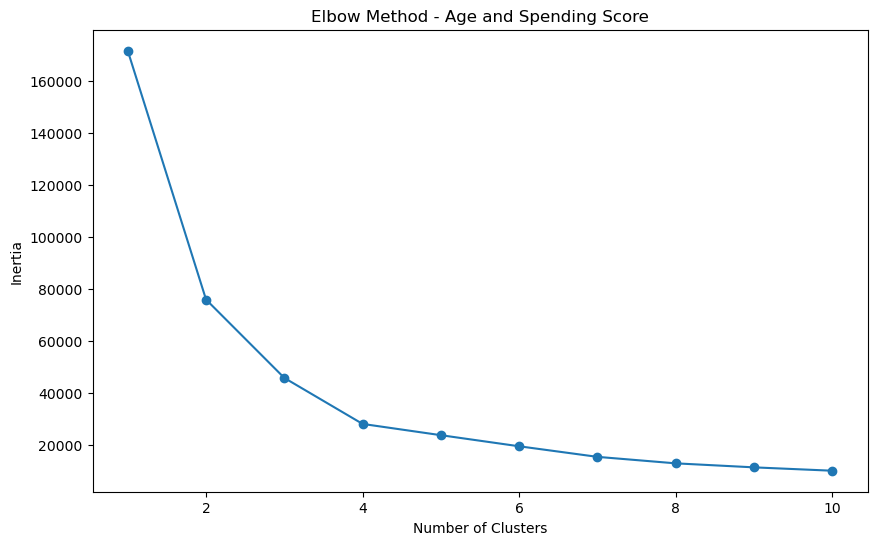

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Age and Spending Score')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(X1)
print(labels)

[0 1 3 1 0 1 3 1 2 1 2 1 2 1 3 1 0 1 2 1 0 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2
 1 3 1 4 1 4 0 2 0 4 0 0 0 4 0 0 4 4 4 4 4 0 4 4 0 4 4 4 0 4 4 0 0 4 4 4 4
 4 0 4 0 0 4 4 0 4 4 0 4 4 0 0 4 4 0 4 0 0 0 4 0 4 0 0 4 4 0 4 0 4 4 4 4 4
 0 0 0 0 0 4 4 4 4 0 0 0 1 3 1 4 1 2 1 2 1 0 1 3 1 2 1 3 1 2 1 0 1 3 1 4 1
 3 1 2 1 2 1 2 1 3 1 3 1 4 1 3 1 2 1 2 1 3 0 3 1 3 1 2 1 2 1 2 1 0 1 2 1 0
 1 2 1 2 1 3 1 3 1 2 1 2 1 3 1]


In [23]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

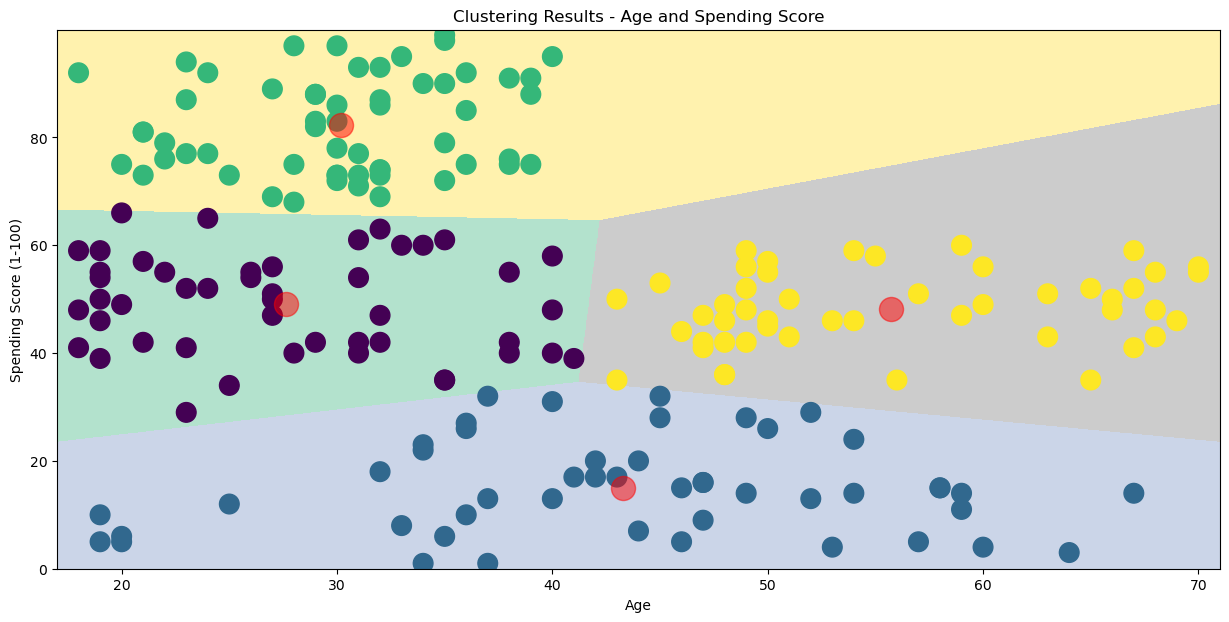

In [24]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize=(15, 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='Age', y='Spending Score (1-100)', data=df, c=labels1,
            s=200)
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.title('Clustering Results - Age and Spending Score')
plt.show()

### 2. Segmentation using Annual Income and Spending Score

In [25]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

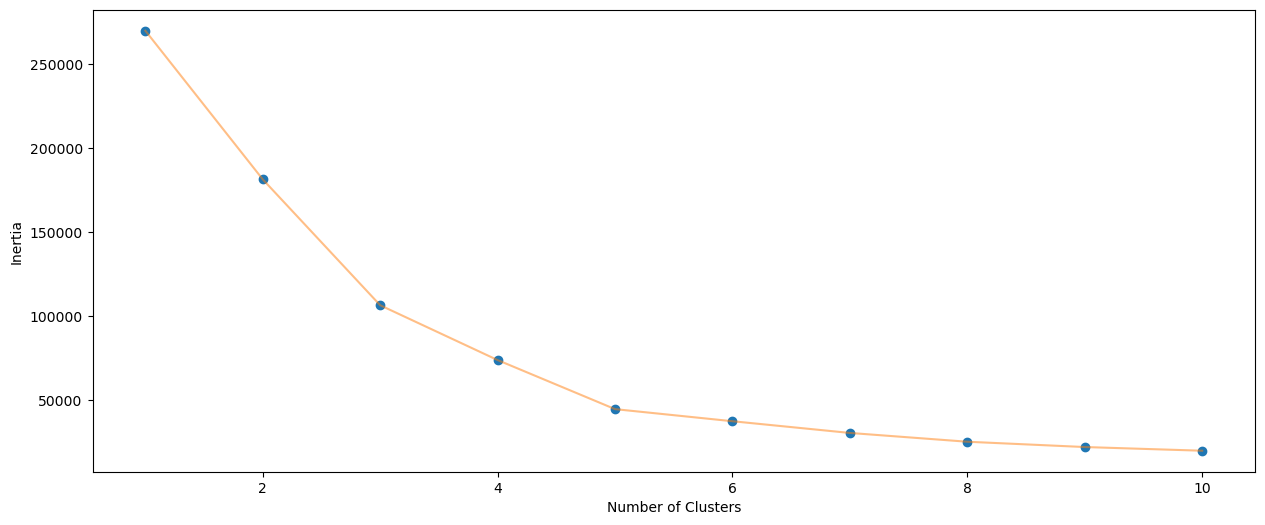

In [26]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(X2)
print(labels)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 2 0 4 0 2 0 2 0 4 0 2 0 2 0 2 0 2 0 4 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [28]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

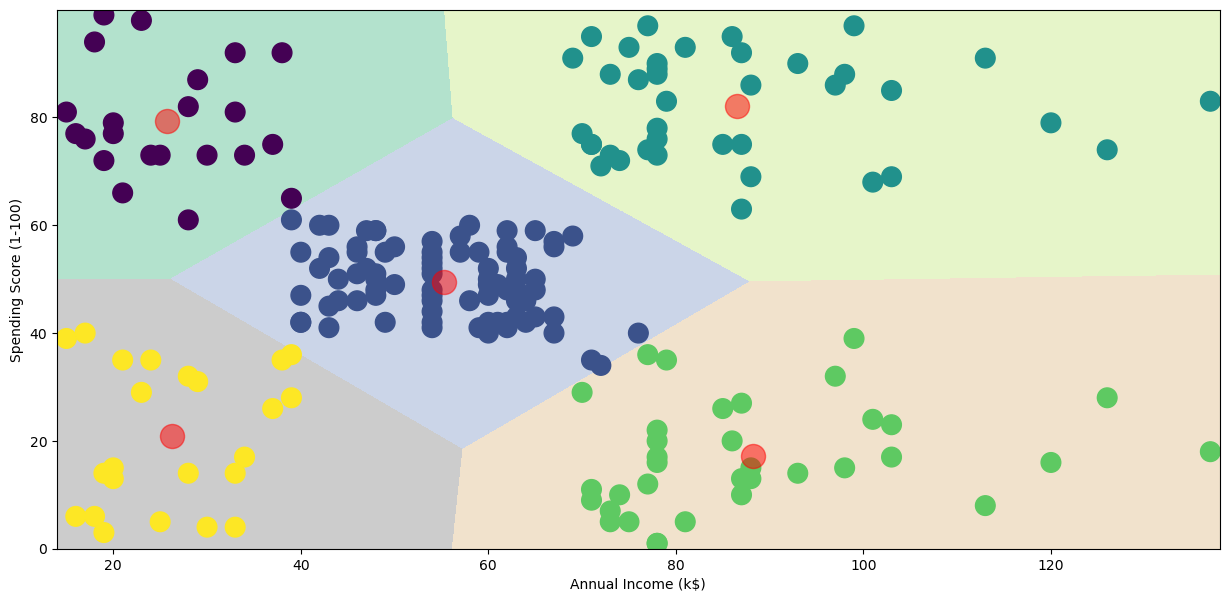

In [29]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

### 3.Segmentation using Age , Annual Income and Spending Score

In [30]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

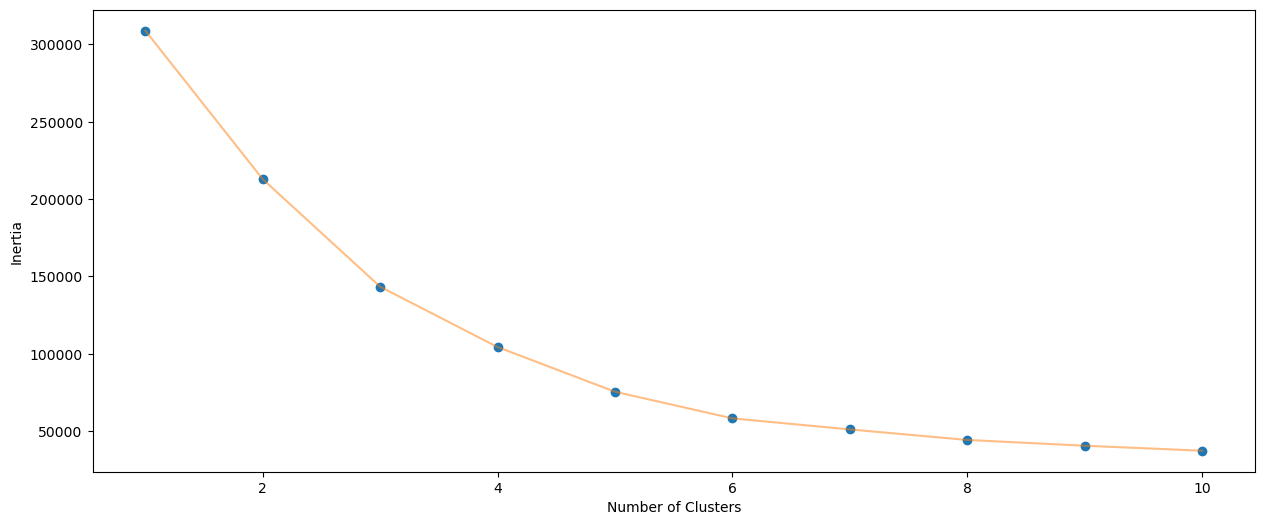

In [31]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [32]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [33]:
import plotly.graph_objects as go

# Assign cluster labels to the DataFrame
labels3 = kmeans.labels_
df['label3'] = labels3

# Create the trace with modified marker properties
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['label3'],
        size=5,  # Decrease the size of the circles
        line=dict(
            color=df['label3'],
            width=0.2  # Decrease the width of the circle borders
        ),
        opacity=0.8
    )
)

data = [trace1]

layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

## Hierarchical Clustering

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

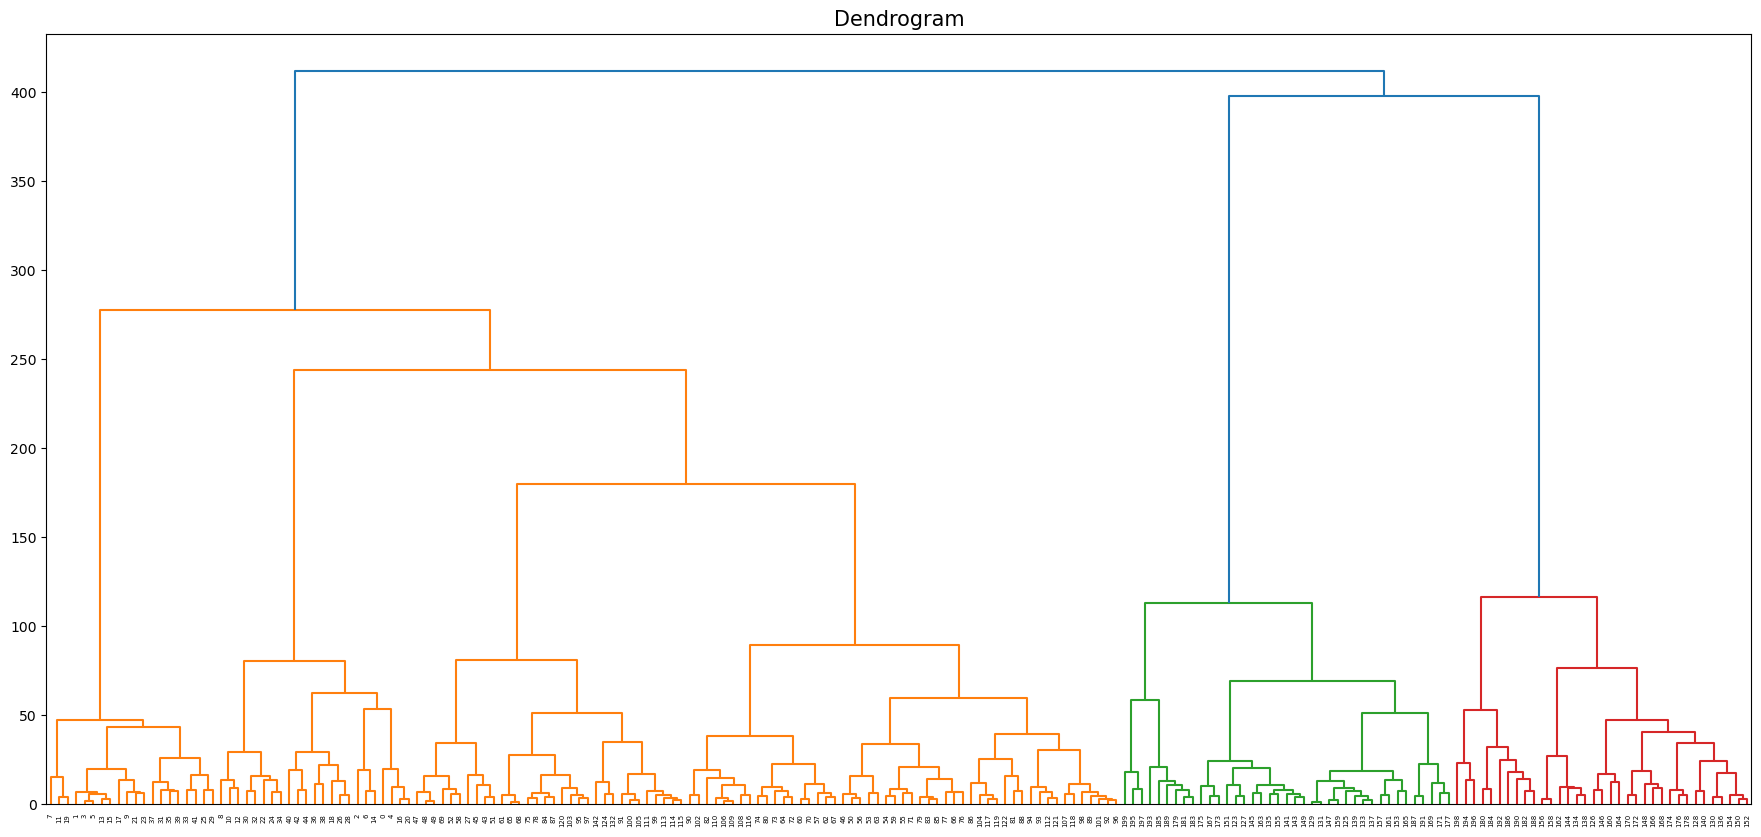

In [35]:
plt.figure(figsize = (22, 10))

dendo = dendrogram(linkage(X3, method = 'ward'))
plt.title('Dendrogram', fontsize = 15)
plt.show()

In [36]:
agc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
labels = agc.fit_predict(X3)

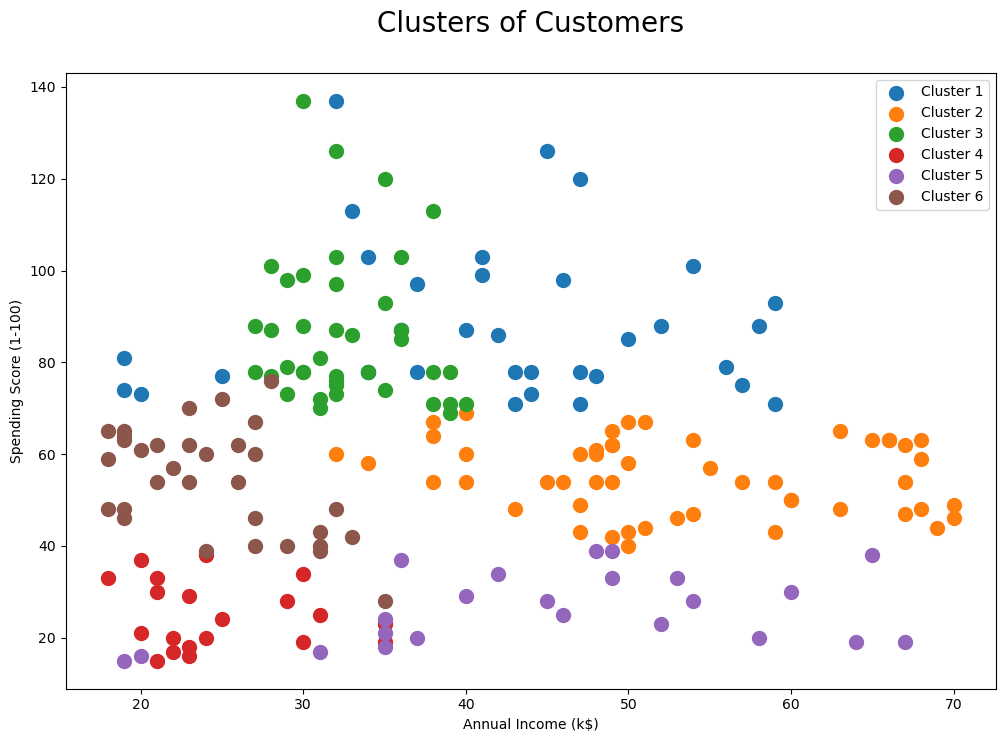

In [37]:
plt.figure(figsize = (12, 8))

plt.scatter(X3[labels == 0,0], X3[labels == 0,1], label = 'Cluster 1', s = 100)
plt.scatter(X3[labels == 1,0], X3[labels == 1,1], label = 'Cluster 2', s = 100)
plt.scatter(X3[labels == 2,0], X3[labels == 2,1], label = 'Cluster 3', s = 100)
plt.scatter(X3[labels == 3,0], X3[labels == 3,1], label = 'Cluster 4', s = 100)
plt.scatter(X3[labels == 4,0], X3[labels == 4,1], label = 'Cluster 5', s = 100)
plt.scatter(X3[labels == 5,0], X3[labels == 5,1], label = 'Cluster 6', s = 100)

plt.legend(loc = 'best')
plt.title('Clusters of Customers\n ', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## DBSCAN

In [38]:
centers = [[1, 1], [-1, -1], [1, -1]]  
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, 
                            random_state=0)  # generate sample blobs

X = StandardScaler().fit_transform(X)

In [39]:
# DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

# we are calculating these for showcasing in diagram
# creating an array of true and false as the same size as db.labels
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  
core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True
labels = db.labels_  # similar to the model.fit() method, it gives the labels of the clustered data

In [40]:
# Number of clusters in labels, ignoring noise if present.

# the label -1 is considered as noise by the DBSCAN algorithm
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
n_noise_ = list(labels).count(-1)  # calculating the number of clusters

In [41]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

"""Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class."""

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953


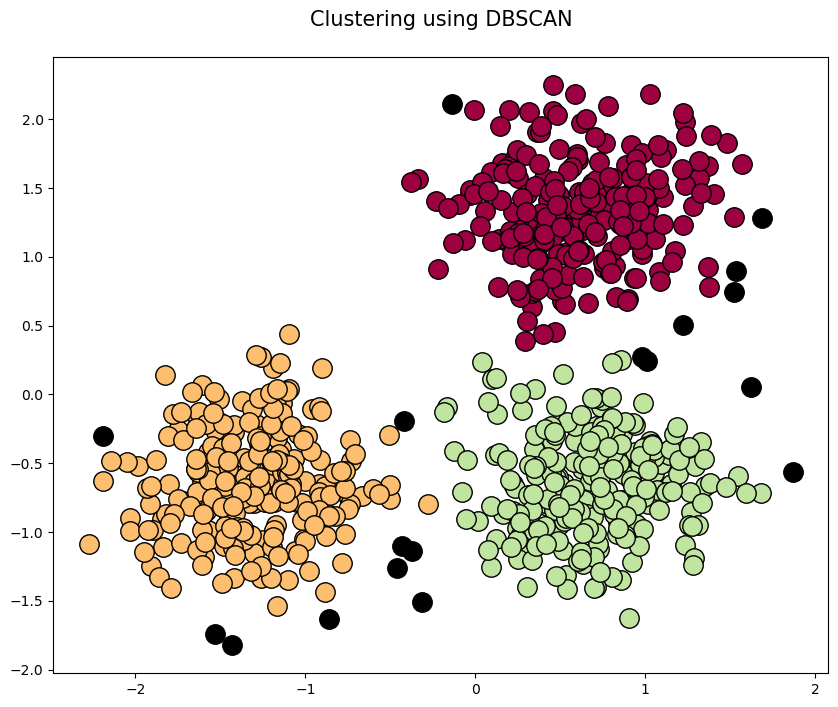

In [42]:
# Plot result
plt.figure(figsize = (10, 8))

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          # creating the list of colours, generating the colourmap
          for each in np.linspace(0, 1, len(unique_labels))]  

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)   # assigning class members for each class
    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class  
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points   
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    
plt.title('Clustering using DBSCAN\n', fontsize = 15)
plt.show()